# Ground State Chemical Potential and Energy in 2 Dimensions

## 1. Chemical Potential

### 1d Setup

In [ ]:
import numpy as np
from scipy import integrate
from scipy import special
import matplotlib.pyplot as plt

t = 1

def I_1(x):
    if np.abs(x) <= 2*t:
        result = np.heaviside(x + 2*t, 1) - (1 / np.pi) * np.arccos(x / (2*t))
    else:
        result = np.heaviside(x + 2*t, 1)
    return result
    
def rho_1d(mu, U):
    if U >= 0:
        return I_1(mu) + I_1(mu - U)
    elif U < 0:
        return 2 * I_1(mu - U/2)
    
def one_plot(x_array, y_array,x_label, y_label):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
 ##   

    

### Replicate Results for 1D, New $\mu$ Plot

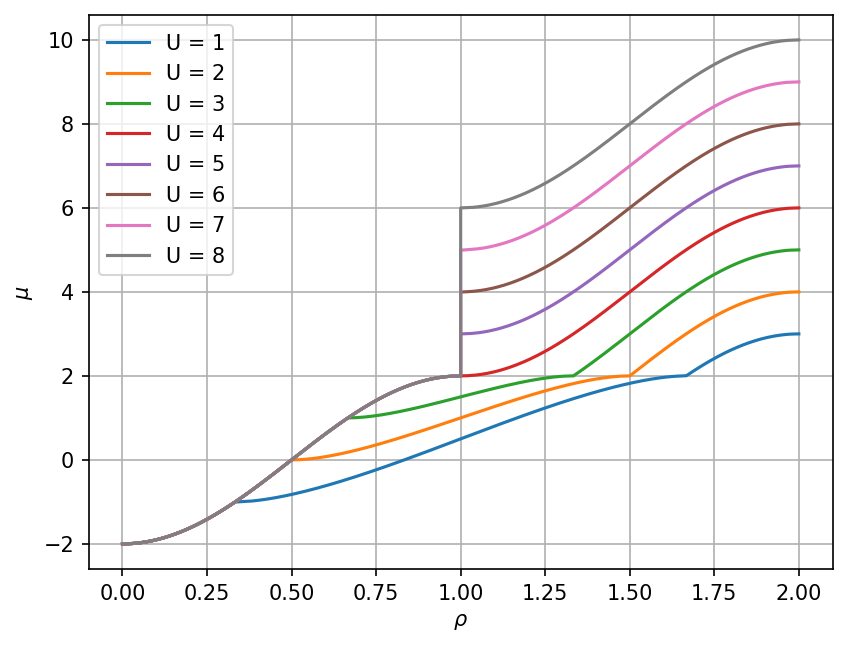

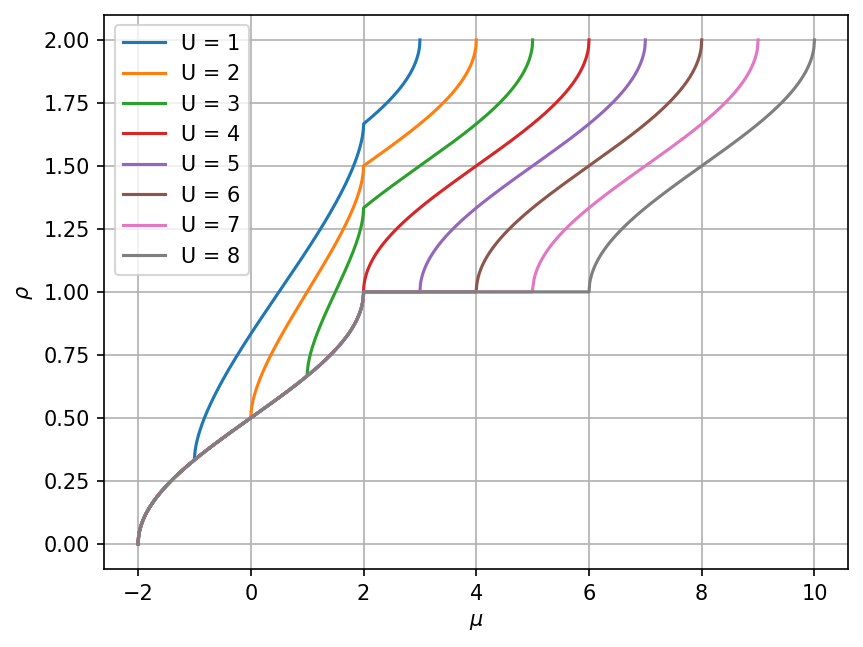

In [5]:
U_values = [1,2,3,4,5,6,7,8]
rho_arrays = []
mu_arrays = []

for U_i in U_values:
    mu_array = np.linspace(-2, 2*t + U_i, 1000, endpoint=True)
    rho_array = []
    for mu_i in mu_array:
        rho_array.append(rho_1d(mu_i, U_i))
    rho_arrays.append(rho_array)
    # Normalize the mu arrays
#    mu_array /= (2*t + U_i)
    mu_arrays.append(mu_array)
    
def many_plots(U_array, x_arrays, y_arrays, xlabel, ylabel):
    plt.figure(dpi=150)
    # Plot erstellen
    for i in range(len(x_arrays)):
        plt.plot(x_arrays[i], y_arrays[i], linestyle='-', label=f'U = {U_array[i]}')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

many_plots(U_values, rho_arrays, mu_arrays, r'$\rho$', r'$\mu$')
many_plots(U_values, mu_arrays, rho_arrays, r'$\mu$', r'$\rho$')



### 2D Calculations

In [6]:
d = 2

def I_2(x):
    def I_1_shifted(k):
        return I_1(x + 2*t*np.cos(k))
    
    integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)
    
    return integral_value[0] / (2*np.pi)

def rho_2d(mu, U):
    if U >= 0:
        return I_2(mu) + I_2(mu - U)
    elif U < 0:
        return 2 * I_2(mu - U/2)
 
U_values_2d = [1,2,4,6,8,10,12,14]
rho_arrays_2d = []
mu_arrays_2d = []

for U_i in U_values_2d:
    mu_array = np.linspace(-2*d, 2*t*d + U_i, 1000, endpoint=True)
    rho_array = []
    for mu_i in mu_array:
        rho_array.append(rho_2d(mu_i, U_i))
    rho_arrays_2d.append(rho_array)
    # Normalize the mu arrays
#    mu_array /= (2*t + U_i)
    mu_arrays_2d.append(mu_array)

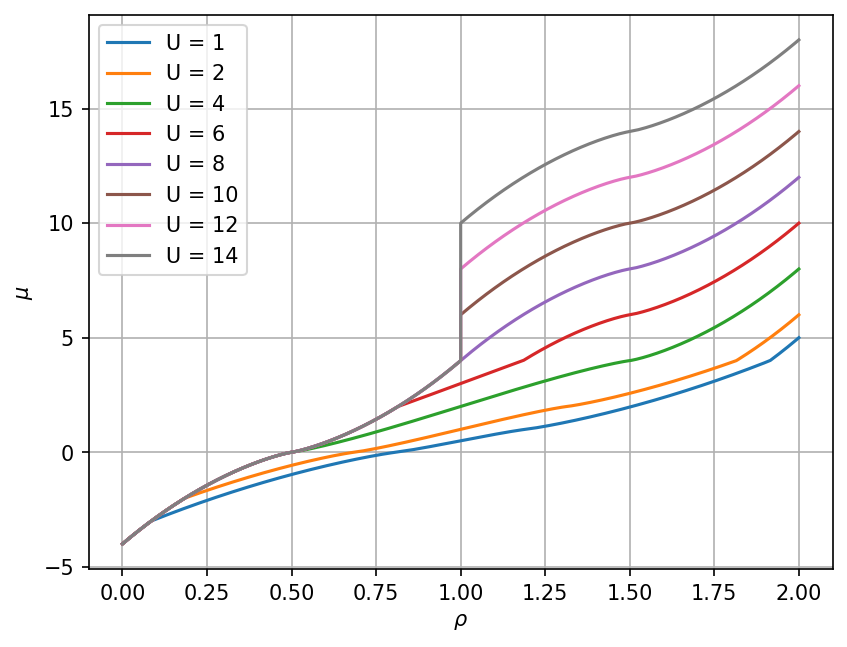

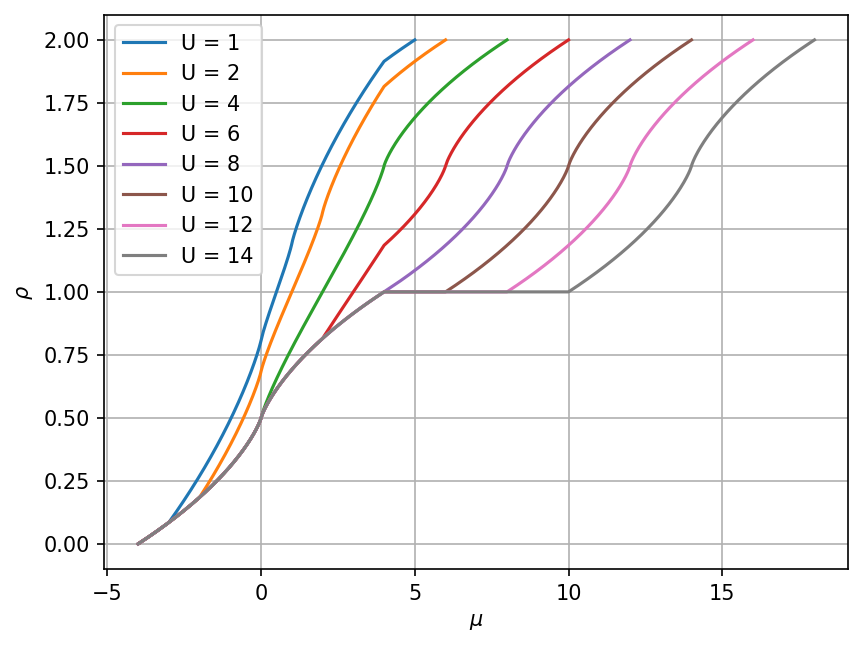

In [7]:
many_plots(U_values_2d, rho_arrays_2d, mu_arrays_2d, r'$\rho$', r'$\mu$')
many_plots(U_values_2d, mu_arrays_2d, rho_arrays_2d, r'$\mu$', r'$\rho$')

## 2. Compressibility

### Verifying 1D

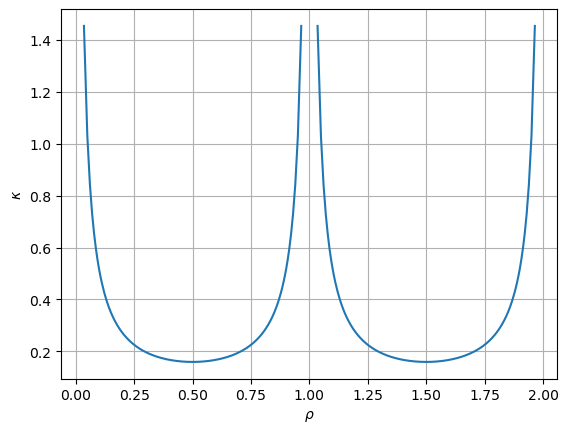

In [8]:
def del_I_1(x):
    if np.abs(x) < 2*t:
        return 1 / (np.pi * np.sqrt((2*t)**2 - x**2))
    else:
        return None
    
def kappa_1d(mu, U):
    if U > 0:
        I1 = del_I_1(mu)
        I2 = del_I_1(mu - U)
        if I1 != None and I2 != None:
            return I1 + I2
        elif I1 == None and I2 != None:
            return I2
        elif I1 != None and I2 == None:
            return I1
        else:
            return None
    else:
        I = del_I_1(mu - U/2)
        if I != None:
            return 2 * I
        else:
            return None
 
kappa_values = []
for mu_i in mu_arrays[7]:
    kappa_values.append(kappa_1d(mu_i, U_values[7]))
 
one_plot(rho_arrays[7], kappa_values, r'$\rho$', r'$\kappa$')

### 2d Calculations

In [37]:
def DOS_2D(E):
    def integrand_DOS_2d(k):
       if -1 <= E/(2*t) + np.cos(k) <= 1:
            integrand = 1 / np.sqrt(1 - (E/(2*t) + np.cos(k))**2)
            return integrand
       else:
            return 0
       
    int_value = integrate.quad(integrand_DOS_2d, 0, np.pi)
    full_DOS = int_value[0] / (2 * np.pi**2 * t)
    return full_DOS

def kappa_2d(mu, U):
    if U >= 0:
        return DOS_2D(mu) + DOS_2D(mu - U)
    else:
        return 2 * DOS_2D(mu - U/2)
    

kappa_values_2d = []

for i in range(len(U_values_2d)):
    print(f'Current interaction: {U_values_2d[i]}')
    kappa_array = []
    for mu_i in mu_arrays_2d[i]:
        kappa_array.append(kappa_2d(mu_i, U_values_2d[i]))
    kappa_values_2d.append(kappa_array)


Current interaction: 1


/tmp/ipykernel_14113/453837813.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  integrand = 1 / np.sqrt(1 - (E/(2*t) + np.cos(k))**2)
/tmp/ipykernel_14113/453837813.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int_value = integrate.quad(integrand_DOS_2d, 0, np.pi)
/tmp/ipykernel_14113/453837813.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_value = integrate.quad(integrand_DOS_2d, 0, np.pi)
/tmp/ipykernel_14113/453837813.py:9: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  int

Current interaction: 2
Current interaction: 4
Current interaction: 6
Current interaction: 8
Current interaction: 10
Current interaction: 12
Current interaction: 14


[1, 2, 4, 6, 8, 10, 12, 14]
Van-Hove Singularity at $\rho = 0.5$ and $\rho=1.5$?
U = 14


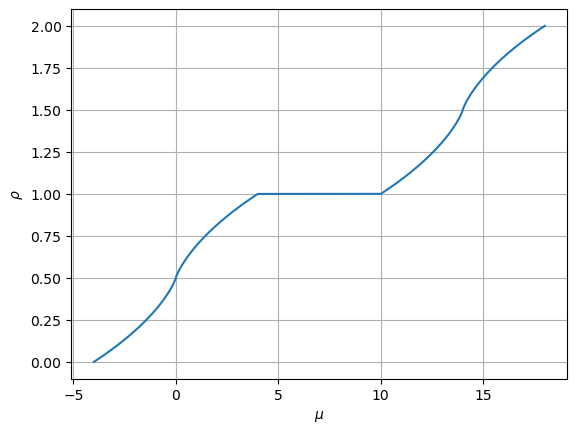

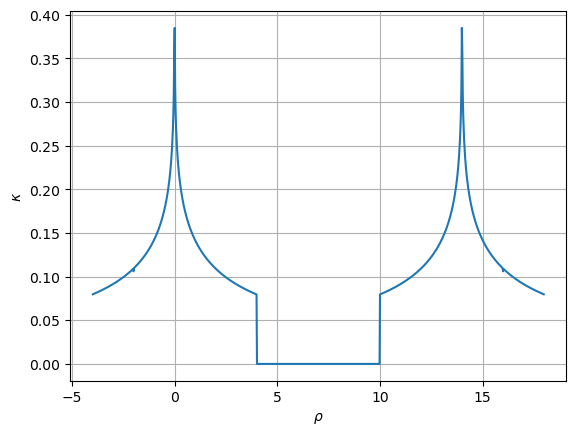

In [59]:
print(U_values_2d)
U_index = 7
print('Van-Hove Singularity at', r'$\rho = 0.5$', 'and', r'$\rho=1.5$?')
print(f'U = {U_values_2d[U_index]}')
one_plot(mu_arrays_2d[U_index], rho_arrays_2d[U_index], r'$\mu$', r'$\rho$')
one_plot(mu_arrays_2d[U_index][1:-1], kappa_values_2d[U_index][1:-1], r'$\rho$', r'$\kappa$')

#many_plots(U_values_2d, mu_arrays_2d, kappa_values_2d, r'$\mu$', r'$\kappa$')

## 3. Energy

In [10]:
###